# 임포트 작업

In [1]:
import sys
sys.version

'3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]'

In [2]:
#파일을 읽어오는 함수
from sklearn.datasets import load_files

In [3]:
# KoNLPy 라이브러리 안에 Okt, Kkma 임포트
from konlpy.tag import Okt, Kkma
okt = Okt()
kkma = Kkma()

In [4]:
# CountVectorizer와 연결해서 사용하기(BOW)
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
# TfidfVectorizer와 연결해서 사용하기(Tf-idf)
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
# LinearSVC 임포트하기
from sklearn.svm import LinearSVC

In [7]:
# 선형회귀모델 임포트하기
from sklearn.linear_model import LogisticRegression

In [8]:
# X(문제), y(정답)을 넣으면 X_train, X_test, y_train, y_test로 만들어주고
# 데이터를 섞어줌
# train과 test의 비율을 조절할 수 있다.
from sklearn.model_selection import train_test_split

In [9]:
#파이프라인 임포트
from sklearn.pipeline import make_pipeline

In [10]:
# GridSearch 임포트하기
from sklearn.model_selection import GridSearchCV

In [11]:
#교차검증 임포트하기
from sklearn.model_selection import cross_val_score

In [12]:
#데이터 임포트하기
import pandas as pd

In [13]:
# matplotlib 임포트
import matplotlib.pyplot as plt
import matplotlib

In [14]:
#한글을 지원하는 폰트로 변경해주는 작업
from matplotlib import font_manager, rc

In [15]:
import re

In [16]:
okt = Okt()
kkma = Kkma()

## okt, kkma 사용법
- text = '성규야 넌 참 발표도 잘하고 멋진데 왜 나를 그렇게 괴롭혀? 너 그렇게 살면 진짜 큰일나 정신차려 제발'
- okt.pos(text)
- kkma.pos(text)
- text1 = okt.pos(text, norm=True, stem=True)
- text1
- okt.phrases(text)
- okt.nouns(text)

# 문제정의
- 임의의 문장과 그에 따른 감정 데이터셋으로 감성분석을 진행
- KoNLPy를 사용해서 형태소를 분류한다

In [17]:
text = pd.read_csv('./data/tr_copy.csv')

# 데이터전처리

In [18]:
text.head()

,번호,감정_대분류,감정_소분류,사람문장1,사람문장2,사람문장3,Unnamed: 6
0,24070,기쁨,신이 난,지금 난 기분이 너무 좋아.,오늘부터 연휴가 시작됐거든. 내일 회사 안 간다.,그냥 집에서 뒹굴뒹굴하고 넷플릭스 보고 놀 거야.,NaN
1,27879,기쁨,신이 난,나도 조카가 생겨! 너무 기뻐.,응. 언니에게 꽃다발을 선물할 거야. 예쁜 딸이면 좋을 것 같아서.,NaN,NaN
2,51471,불안,불안,거래처와의 다음 계약이 무산될까봐 불안해.,딱히 이유는 없어. 그냥 나 혼자 불안한 상태야.,NaN,NaN
3,7140,슬픔,염세적인,당뇨로 고생 중인데 아내가 이혼하자더군. 아내가 날 버리면 병은 더 악화될 텐데 세...,젊은 시절에 가정에 소홀했지. 그래도 그렇지 이혼을 하자니 너무 허망해.,아내에게 졸혼은 어떤지 대화를 나누어 봐야겠어. 졸혼을 한다면 가끔씩이라도 도움을 ...,NaN
4,39663,슬픔,마비된,노년에 재정적으로 이루어 놓은게 없어서 걱정이야.,정말이지 막막해.,NaN,NaN


## text 결측치 채우기

In [19]:
text['사람문장3']

0                              그냥 집에서 뒹굴뒹굴하고 넷플릭스 보고 놀 거야.
1                                                      NaN
2                                                      NaN
3        아내에게 졸혼은 어떤지 대화를 나누어 봐야겠어. 졸혼을 한다면 가끔씩이라도 도움을 ...
4                                                      NaN
                               ...                        
84207                                                  NaN
84208                      잔소리만 하는 게 아니야. 옆에 있는 것도 이제 지겨워.
84209                        그래야 할거 같아 내가 배우고 싶은걸 생각해봐야겠어.
84210              지금까지 열심히 살았고 앞으로도 열심히 살면 만족스러운 노후가 되겠지.
84211                                                  NaN
Name: 사람문장3, Length: 84212, dtype: object

In [20]:
#결측치 값에 공백을 넣어 결측치 값 채우기
text['사람문장3'].fillna(' ', inplace = True)

In [21]:
text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84212 entries, 0 to 84211
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   번호          84212 non-null  int64  
 1   감정_대분류      84212 non-null  object 
 2   감정_소분류      84212 non-null  object 
 3   사람문장1       84212 non-null  object 
 4   사람문장2       84212 non-null  object 
 5   사람문장3       84212 non-null  object 
 6   Unnamed: 6  0 non-null      float64
dtypes: float64(1), int64(1), object(5)
memory usage: 4.5+ MB


In [22]:
#사람문장 1,2,3 합치기!!
text_text = text['사람문장1'] + text['사람문장2'] + text['사람문장3']

In [23]:
#결측치값 없이 없어진 걸 확인함!!
text_text[84211]

'우리 팀 직장 동료가 최근에 유산했다고 연락 왔어. 내가 너무 일을 많이 시켜서 유산한 것 같아 죄책감 들어.지금은 휴가 내고 쉬고 있는데 복귀하면 최대한 스트레스 받지 않도록 업무적으로 배려해주기로 했어. 직장동료가 얼른 몸과 마음이 회복되기를 바랄 뿐이야. '

In [24]:
text_text[0]

'지금 난 기분이 너무 좋아.오늘부터 연휴가 시작됐거든. 내일 회사 안 간다.그냥 집에서 뒹굴뒹굴하고 넷플릭스 보고 놀 거야.'

## train,test 나누기

In [25]:
X = text_text
X

0        지금 난 기분이 너무 좋아.오늘부터 연휴가 시작됐거든. 내일 회사 안 간다.그냥 집...
1        나도 조카가 생겨! 너무 기뻐.응. 언니에게 꽃다발을 선물할 거야. 예쁜 딸이면 좋...
2        거래처와의 다음 계약이 무산될까봐 불안해.딱히 이유는 없어. 그냥 나 혼자 불안한 ...
3        당뇨로 고생 중인데 아내가 이혼하자더군. 아내가 날 버리면 병은 더 악화될 텐데 세...
4                    노년에 재정적으로 이루어 놓은게 없어서 걱정이야.정말이지 막막해. 
                               ...                        
84207    은퇴 및 노후준비로 외로움을 느낀 적은 모든 짐을 나에게 미루는 듯한 배우자의 태도...
84208    배우자와 심하게 다투었어.집안일을 돕지 않는다고 잔소리를 많이 해서 나도 화가 나서...
84209    자식이 다 크고나니 떠나고 나만 혼자 남은 거같아.어 자식키우느라 할줄 아는게 없으...
84210    열심히 일하면서 아이들 키우고 노후 준비도 했지.은퇴할 때가 가까워져도 걱정은 없어...
84211    우리 팀 직장 동료가 최근에 유산했다고 연락 왔어. 내가 너무 일을 많이 시켜서 유...
Length: 84212, dtype: object

In [26]:
y = text['감정_대분류']
y

0        기쁨
1        기쁨
2        불안
3        슬픔
4        슬픔
         ..
84207    슬픔
84208    불안
84209    슬픔
84210    기쁨
84211    불안
Name: 감정_대분류, Length: 84212, dtype: object

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                   random_state = 0)

In [28]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((58948,), (25264,), (58948,), (25264,))

In [29]:
X_train

38181    원래 통풍이 있었는데 아내는 내가 술과 고기를 좋아하다가 그렇게 된 거라고 핀잔을 ...
22827    벌써 몇 시간째 못 푼 수학 문제가 있어. 이거 때문에 머리가 너무 아파.왜 문제 ...
67818    이제 은퇴할 시기가 다가오니 걱정이 많아.그래. 은퇴 시기가 멀지 않았어.그러게나 ...
35059              우리 엄마 아빠가 매일 싸워서 이혼하게 생겼어.일단 지켜봐야할것같아. 
72008              요즘 회사 사정이 안좋아.이대로 가다간 정리 해고당할 지도 모르겠어. 
                               ...                        
21243    오늘 나보다 나이 어린 상사에게 크게 혼쭐이 났어.크게 잘못 처리한 일도 없는데 그...
45891    아침마다 달리기를 했더니 몸상태가 너무좋아졌어.건강한 식재료로 밥을먹고 꾸준히 운동...
42613             몸이 아프니 돈들어갈곳이 많네.그동안 모아놓은돈 다 쓸것같아 걱정이야. 
43567    어제 우리집 자산 상태를 알아보려고 은행 통장들이랑 펀드 주식 기타 등등 다 꺼내놓...
68268    혼전 임신을 하게 됐어. 주변에 어떻게 이야기하지? 아직은 직장 동료나 친구에게 말...
Length: 58948, dtype: object

## 토큰화
- 사용해볼 속성들!!
    -   max_df=1.0  (몇 개 이상으로 넘어가면 사용하지 않겠다)
    -   min_df=1 (몇 개 이하로 나오면 사용하지 않겠다)
    -   max_features=None (??????)

In [31]:
def myTokenizer2(text):
    d = pd.DataFrame(okt.pos(text, norm=True, stem=True), columns=['morph','tag'])
    d.set_index('tag', inplace=True)
    if ('Noun' in d.index) | ('Verb' in d.index) | ('Adjective' in d.index):
        labels = ['Noun','Verb','Adjective']
        return d.loc[d.index.intersection(labels)].dropna()['morph'].values
    else :
        return []

### CountVectorizer

In [33]:
cv_okt = CountVectorizer(tokenizer=myTokenizer2 )

In [34]:
cv_okt.fit(X_train)

C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


CountVectorizer(tokenizer=<function myTokenizer2 at 0x00000230C436D4C0>)

In [35]:
len(cv_okt.vocabulary_)

15576

In [36]:
cv_okt.vocabulary_

{'원래': 10003,
 '통풍': 13837,
 '아내': 8390,
 '내': 2319,
 '술': 7709,
 '고기': 836,
 '거': 430,
 '핀잔': 14470,
 '해': 14768,
 '말': 4220,
 '오해': 9588,
 '게': 606,
 '설명': 7144,
 '있다': 10915,
 '좋아하다': 11970,
 '아니다': 8394,
 '되다': 3487,
 '하다': 14509,
 '풀리다': 14354,
 '걸리다': 561,
 '벌써': 5517,
 '몇': 4536,
 '시간': 7871,
 '못': 4673,
 '푼': 14346,
 '수학': 7649,
 '문제': 4850,
 '때문': 3748,
 '머리': 4382,
 '왜': 9692,
 '하나': 14496,
 '나': 2063,
 '생각': 6930,
 '좀': 11932,
 '아프다': 8496,
 '어렵다': 8917,
 '건지다': 546,
 '모르다': 4558,
 '푸다': 14338,
 '걸다': 556,
 '쉬다': 7746,
 '식히다': 8030,
 '이제': 10568,
 '은퇴': 10297,
 '시기': 7883,
 '걱정': 500,
 '인생': 10660,
 '직장': 12406,
 '몸': 4652,
 '일': 10716,
 '다가오다': 2731,
 '않다': 8614,
 '빠지다': 6365,
 '많다': 4216,
 '그렇다': 1542,
 '멀다': 4414,
 '허무하다': 14926,
 '우리': 9853,
 '엄마': 9092,
 '아빠': 8437,
 '매일': 4348,
 '이혼': 10609,
 '일단': 10736,
 '싸우다': 8280,
 '생기다': 6937,
 '지켜보다': 12360,
 '야하다': 8801,
 '같다': 373,
 '요즘': 9794,
 '회사': 15351,
 '사정': 6608,
 '정리': 11665,
 '해고': 14771,
 '지도': 12283,
 '안좋다': 8594,


In [37]:
cv_okt.vocabulary_.keys()

dict_keys(['원래', '통풍', '아내', '내', '술', '고기', '거', '핀잔', '해', '말', '오해', '게', '설명', '있다', '좋아하다', '아니다', '되다', '하다', '풀리다', '걸리다', '벌써', '몇', '시간', '못', '푼', '수학', '문제', '때문', '머리', '왜', '하나', '나', '생각', '좀', '아프다', '어렵다', '건지다', '모르다', '푸다', '걸다', '쉬다', '식히다', '이제', '은퇴', '시기', '걱정', '인생', '직장', '몸', '일', '다가오다', '않다', '빠지다', '많다', '그렇다', '멀다', '허무하다', '우리', '엄마', '아빠', '매일', '이혼', '일단', '싸우다', '생기다', '지켜보다', '야하다', '같다', '요즘', '회사', '사정', '정리', '해고', '지도', '안좋다', '당하다', '가다', '년', '후', '나이', '그동안', '여생', '여행', '살', '일만', '상', '여유롭다', '주다', '편하다', '좋다', '정말', '혐오', '생활', '꼭', '운', '그', '이름', '자체', '난', '조만간', '퇴사', '알다', '스럽다', '내년', '줄', '나오다', '다니다', '남편', '바람', '것', '복수', '목', '비틀', '만큼', '피우다', '싶다', '화나다', '수술', '담배', '스트레스', '대신', '군것질', '거리', '사', '받다', '먹다', '끊다', '번거롭다', '자금', '펀드', '고해', '혹시', '손', '염려', '경제', '상황', '신경', '자다', '쓰이다', '불안하다', '친구', '아들', '약', '괜시리', '질투', '자식', '한번', '이야기', '나다', '해보다', '건강하다', '부모님', '항상', '공무원', '공부', '강요', '사실', '재능', '컴퓨터', '게임', '흥미', '지

In [38]:
#토큰화 된 단어들을 가지고 수치화 진행
X_train_okt_cv = cv_okt.transform(X_train)
X_test_okt_cv = cv_okt.transform(X_test)

In [39]:
X_train_okt_cv

<58948x15576 sparse matrix of type '<class 'numpy.int64'>'
	with 1174805 stored elements in Compressed Sparse Row format>

In [40]:
X_train_okt_cv.shape

(58948, 15576)

In [41]:
X_test_okt_cv

<25264x15576 sparse matrix of type '<class 'numpy.int64'>'
	with 501437 stored elements in Compressed Sparse Row format>

In [42]:
X_test_okt_cv.shape

(25264, 15576)

### TfidfVectorizer

In [43]:
tf_okt = TfidfVectorizer(tokenizer=mytoken)

In [44]:
tf_okt = TfidfVectorizer(tokenizer=myTokenizer2 )

In [45]:
tf_okt.fit(X_train)

TfidfVectorizer(tokenizer=<function myTokenizer2 at 0x00000230C436D4C0>)

In [46]:
len(tf_okt.vocabulary_)

15576

In [47]:
#토큰화 된 단어들을 가지고 수치화 진행
X_train_okt_tf = tf_okt.transform(X_train)
X_test_okt_tf = tf_okt.transform(X_test)

In [48]:
X_train_okt_tf

<58948x15576 sparse matrix of type '<class 'numpy.float64'>'
	with 1174805 stored elements in Compressed Sparse Row format>

In [49]:
X_train_okt_tf.shape

(58948, 15576)

In [50]:
X_test_okt_tf

<25264x15576 sparse matrix of type '<class 'numpy.float64'>'
	with 501437 stored elements in Compressed Sparse Row format>

In [51]:
X_test_okt_tf.shape

(25264, 15576)

# 탐색적데이터분석
- 텍스트마이닝에서는 생략가능

# 모델 선택 및 하이퍼 파라미터 튜닝

## 튜닝 X

### LogisticRegression

In [52]:
lr_model = LogisticRegression()

### Linear SVC

In [53]:
svm_model = LinearSVC()

### SGD

## 튜닝 O

### LogisticRegression

In [54]:
lr_model = LogisticRegression()

### Linear SVC

In [55]:
svm_model = LinearSVC()

### SGD

# 학습

## LogisticRegression

In [56]:
lr_model.fit(X_train_okt_cv, y_train)

C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [57]:
lr_model.fit(X_train_okt_tf, y_train)

C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Linear SVC

In [58]:
svm_model.fit(X_train_okt_cv, y_train)

C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [59]:
svm_model.fit(X_train_okt_tf, y_train)

LinearSVC()

## SGD

# 평가

## LogisticRegression

In [60]:
lr_model.score(X_train_okt_cv, y_train)

0.7487107280993418

In [61]:
lr_model.score(X_test_okt_cv, y_test)

0.7108138062064597

In [62]:
lr_model.score(X_train_okt_tf, y_train)

0.7766675714188777

In [63]:
lr_model.score(X_test_okt_tf, y_test)

0.7219363521215959

## Linear SVC

In [64]:
svm_model.score(X_train_okt_cv, y_train)

0.7929870394245776

In [65]:
svm_model.score(X_test_okt_cv, y_test)

0.7202739075364154

In [66]:
svm_model.score(X_train_okt_tf, y_train)

0.8242518830155391

In [67]:
svm_model.score(X_test_okt_tf, y_test)

0.7118429385687144

##  SGD

## 교차검증

In [68]:
cross_val_score(lr_model, X_train_okt_cv, y_train, cv = 5)

C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

array([0.69219678, 0.69915182, 0.69728584, 0.69827806, 0.70175587])

In [69]:
cross_val_score(svm_model, X_train_okt_tf, y_train, cv = 5)

array([0.69813401, 0.70330789, 0.70559796, 0.70294342, 0.71049283])

## GridSearch

In [70]:
param_grid = {
    'C' : [0.01,0.1,1,5,10],
    'max_iter' : [100 , 1000]
}

In [71]:
grid_lr = GridSearchCV(LogisticRegression(), param_grid, cv = 5)

In [72]:
grid_lr.fit(X_train_okt_tf, y_train)

C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 5, 10], 'max_iter': [100, 1000]})

In [73]:
grid_lr.best_score_

0.7117799927204607

In [74]:
grid_lr.best_params_

{'C': 1, 'max_iter': 1000}

In [75]:
grid_svm = GridSearchCV(LinearSVC(), param_grid, cv = 5)

In [76]:
grid_svm.fit(X_train_okt_tf, y_train)

C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

GridSearchCV(cv=5, estimator=LinearSVC(),
             param_grid={'C': [0.01, 0.1, 1, 5, 10], 'max_iter': [100, 1000]})

In [77]:
grid_svm.best_score_

0.7162924107096285

In [78]:
grid_svm.best_params_

{'C': 0.1, 'max_iter': 100}

# 라벨이 3개이상일때 사용하는 코드

In [79]:
lr_model.predict(X_train_okt_cv)

array(['슬픔', '슬픔', '불안', ..., '불안', '슬픔', '불안'], dtype=object)

In [80]:
a = lr_model.predict_proba(X_train_okt_cv)

In [81]:
feel_list= ['기쁨','분노','불안','슬픔']
a[0]

array([0.15631331, 0.00146257, 0.05160517, 0.79061895])

In [82]:
a.dtype

dtype('float64')

In [83]:
a[0][0]

0.15631330819320763

In [84]:
for i in range(len(feel_list)):
    print(f"{feel_list[i]} : {a[0][i]}")

기쁨 : 0.15631330819320763
분노 : 0.0014625711469217011
불안 : 0.051605174691083444
슬픔 : 0.7906189459687871


# 예측

In [85]:
data =  ['오늘 우리 귀여운 찬호가 옹알이를 시작했다. 이제 1살이 된 녀석이 가장 먼저 한 말이 야스다']

In [86]:
data_review = cv_okt.transform(data)

In [87]:
lr_model.predict(data_review)

array(['기쁨'], dtype=object)

In [88]:
predict = lr_model.predict_proba(data_review)

In [89]:
for i in range(len(feel_list)):
    print(f"{feel_list[i]} : {predict[0][i]}")

기쁨 : 0.9937258146297696
분노 : 0.00023741302339076495
불안 : 0.0011698691210364387
슬픔 : 0.004866903225803072


# 감성분석

In [90]:
#변수 짚어넣기 (단어, 가중치)
voca = cv_okt.vocabulary_ # 단어사전을 만든 것
word_weight = lr_model.coef_ # 단어가 가지고 있는 가중치
#가중치 : 긍정과 부정에 얼마나 영향을 미쳤는가의 점수를 매긴것

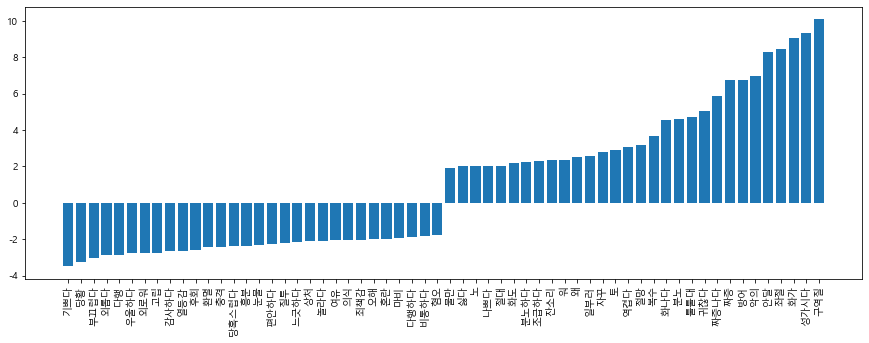

In [91]:
# voca 데이터를 데이터 프레임으로 변환
df = pd.DataFrame([voca.keys(),
                  voca.values()]) 

# 행과 열 위치 전위
df = df.T 

#정렬하기
df_sorted = df.sort_values(by = 1) #단어사전 index 순서대로 정렬
#why? 가중치가 index순으로 정렬되어있기에

df_sorted['coef'] = word_weight[1].reshape(-1) #가중치를 데이터프레임에 추가
df_sorted.sort_values(by ='coef' , inplace = True) #가중치를 기준으로 정렬

#가중치 순위 비교
top30_df = pd.concat([
    df_sorted.head(30), #가중치가 가장높은 30개
    df_sorted.tail(30) #가중치가 가장낮은 30개
])

#한글을 지원하는 폰트로 변경해주는 작업
font_name = font_manager.FontProperties(fname="C:\Windows\Fonts\malgun.ttf").get_name()
rc('font',family=font_name) 

matplotlib.rcParams['axes.unicode_minus'] = False # 마이너스(-)값을 표현해주는 코드


plt.figure(figsize=(15,5)) # 가로,세로 비율
plt.bar(top30_df[0], top30_df['coef']) # x축은 단어, y축은 가중치
plt.xticks(rotation = 90) # x축 눈금 각도 조정
plt.show()

In [92]:
import pickle
import joblib

In [136]:
with open('dodam_cv.pkl', 'wb') as f:
    pickle.dump(cv_okt, f)

In [137]:
with open('dodam_svm.pkl', 'wb') as f:
    pickle.dump(svm_model, f)

In [138]:
with open('dodam_lr.pkl', 'wb') as f:
    pickle.dump(lr_model, f)

# 플라스크 연동

In [94]:
!pip install flask_cors
from flask import Flask
from flask import redirect, request
from flask_cors import CORS
import pickle
import pymysql
import numpy as np
import pandas as pd

In [95]:
new_data =['굉장히 즐거우신 것 같은데요? 좋은 일이 있나요?']
new_data_okt_cv = cv_okt.transform(new_data)
svm_model.predict(new_data_okt_cv)

array(['기쁨'], dtype=object)

In [96]:
with open('dodam_model.pkl', 'rb') as f:
    model = pickle.load(f)
    a = svm_model.predict(new_data_okt_cv)
    print(a[0])

기쁨


In [110]:
def preprocessing(contents):
    with open('dodam.pkl', 'rb') as f:
        model = pickle.load(f)
        contents = request.form.get('diary')
    
    
        new_data_okt_cv = cv_okt.transform(contents)
        return svm_model.predict(new_data_okt_cv)[0]

In [111]:
# 수정
app = Flask(__name__)
CORS(app)


    
@app.route("/test",  methods=["GET", "POST"])
def test():
    if request.method=="POST":
        a = display(request.form)
        print(a)
        # preprocessing()
        
    else:
        return "실패"

    
if __name__ == "__main__":
    app.run(host = "127.0.0.1", port = 3300)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:3300/ (Press CTRL+C to quit)
